<a href="https://colab.research.google.com/github/LeoProvorov/MyProjects/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [3]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]


In [7]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [10]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)


In [12]:
scalled_data = preprocessing.scale(data.T)


In [14]:
pca = PCA()
pca.fit(scalled_data)
pca_data = pca.transform(scalled_data)

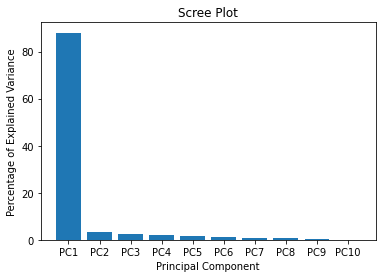

In [19]:
per_var = np.round(pca.explained_variance_ratio_ * 100,
                   decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, 
        tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

plt.show()